## Linear regression with one variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

======================= Part 2: Plotting =======================

In [2]:
def plotData(x,y):
    
    """
    Plots the data points x and y into a new figure 
    PLOTDATA(x,y) plots the data points and gives the figure axes labels of 
    population and profit.
    """
    
    fig, ax = plt.subplots()
    plt.scatter(x, y, c='r',marker='x')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

Plotting Data ...


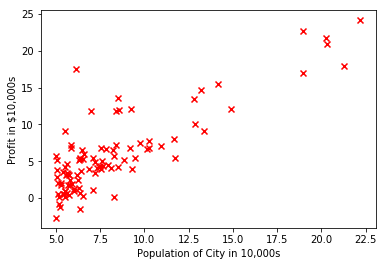

In [3]:
print('Plotting Data ...')
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:,0]
y = data[:, 1]
m = len(y) # number of training examples

# Plot Data
# Note: You have to complete the code in plotData.m
plotData(X, y)

=================== Part 3: Cost and Gradient descent ===================

In [4]:
y = np.reshape(y, (-1, 1))

X = np.reshape(X, (-1,1))
X = np.insert(X, 0, 1, axis=1) # Add a column of ones to x

theta = np.zeros((2, 1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

In [5]:
def computeCost(X, y, theta):  
    """
    COMPUTECOST Compute cost for linear regression
    J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    
    m = len(y) # number of training examples
    inner = np.dot(X, theta) - y
    return ((1/(2*m)) * np.dot(inner.T, inner)).item()

In [6]:
print('Testing the cost function ...')
# compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed = ', J)
print('Expected cost value (approx) 32.07')

# further testing of the cost function
J = computeCost(X, y, np.array([-1, 2], ndmin=2).T)
print('\nWith theta = [-1 ; 2]\nCost computed = ', J)
print('Expected cost value (approx) 54.24')

Testing the cost function ...
With theta = [0 ; 0]
Cost computed =  32.07273387745567
Expected cost value (approx) 32.07

With theta = [-1 ; 2]
Cost computed =  54.24245508201238
Expected cost value (approx) 54.24


In [7]:
def gradientDescent(X, y, theta, alpha, iters):
    """
    GRADIENTDESCENT Performs gradient descent to learn theta
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    
    m = len(y) # number of training examples
    J_history = np.zeros(iters)
    
    for i in range(iters):
        theta = theta - (alpha/m) * np.dot(X.T, (np.dot(X, theta) - y) )
        
        # Save the cost J in every iteration    
        J_history[i] = computeCost(X,y, theta)
        
    return theta, J_history

In [8]:
print('Running Gradient Descent ...')

# run gradient descent
theta, _ = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:')
print('{}\n{}'.format(theta.ravel()[0], theta.ravel()[1]))
print('Expected theta values (approx)')
print(' -3.6303\n  1.1664')

Running Gradient Descent ...
Theta found by gradient descent:
-3.63029143940436
1.166362350335582
Expected theta values (approx)
 -3.6303
  1.1664


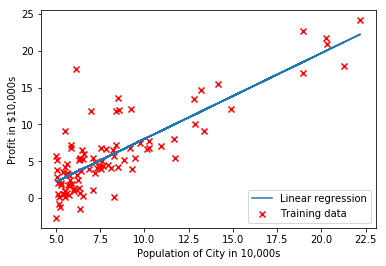

In [9]:
# Plot the linear fit
fig, ax = plt.subplots()
plt.scatter(X[:,1], y, c='r',marker='x', label = 'Training data')
plt.plot(X[:,1], np.dot(X, theta), '-', label = 'Linear regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right')

In [10]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5], ndmin=2), theta).item() * 10000
print('For population = 35,000, we predict a profit of ', predict1)
predict2 = np.dot(np.array([1, 7], ndmin=2), theta).item() * 10000
print('For population = 70,000, we predict a profit of ', predict2)

For population = 35,000, we predict a profit of  4519.7678677017675
For population = 70,000, we predict a profit of  45342.45012944714


============= Part 4: Visualizing J(theta_0, theta_1) =============

In [11]:
print('Visualizing J(theta_0, theta_1) ...')

Visualizing J(theta_0, theta_1) ...


Text(0.5,0,'theta_1')

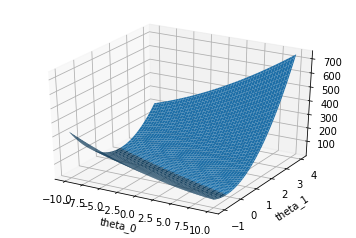

In [12]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i,j] = computeCost(X, y, t)
        
# Because of the way meshgrids work in the surf command, 
# we need to transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

X_grid, Y_grid = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, J_vals)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')

Text(0,0.5,'\theta_1')

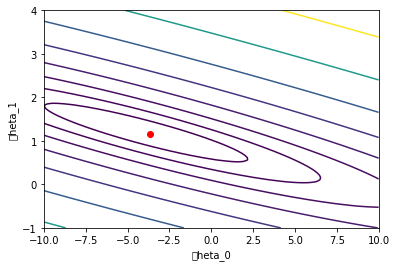

In [13]:
# Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
fig, ax = plt.subplots()
plt.contour(X_grid, Y_grid, J_vals, levels=np.logspace(-2, 3, 20))
plt.scatter(theta[0], theta[1], c='r')
plt.xlabel('\theta_0') 
plt.ylabel('\theta_1')